In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import yfinance as yf

In [2]:
tickers = ['TSLA', 'GS']

In [3]:
colnames = []
for ticker in tickers:
    ts = yf.Ticker(ticker)
    data = ts.history(interval="1h", period="2y")["Close"]
    if len(colnames)==0:
        combined = data.copy()
    else:
        combined = pd.concat([combined, data.copy()], axis = 1)
    colnames.append(ticker)
    combined.columns = colnames

In [4]:
# 7 entries per day
combined.head(5)

,TSLA,GS
Datetime,,
2022-05-11 09:30:00-04:00,266.500000,307.859711
2022-05-11 10:30:00-04:00,261.570007,308.364990
2022-05-11 11:30:00-04:00,258.515472,306.959106
2022-05-11 12:30:00-04:00,251.690002,304.630005
2022-05-11 13:30:00-04:00,249.190002,305.785004


In [5]:
df = np.log(combined)

In [6]:
df.shift(1)

,TSLA,GS
Datetime,,
2022-05-11 09:30:00-04:00,NaN,NaN
2022-05-11 10:30:00-04:00,5.585374,5.729644
2022-05-11 11:30:00-04:00,5.566702,5.731284
2022-05-11 12:30:00-04:00,5.554956,5.726715
2022-05-11 13:30:00-04:00,5.528198,5.719098
...,...,...
2024-05-10 11:30:00-04:00,5.130801,6.123063
2024-05-10 12:30:00-04:00,5.126461,6.121264
2024-05-10 13:30:00-04:00,5.127648,6.119330


In [7]:
log_ratio_df = df - df.shift(1)

In [8]:
log_ratio_df['corr_gs_tsla']=df['GS'].rolling(70).corr(df['TSLA'])

In [9]:
log_ratio_df

,TSLA,GS,corr_gs_tsla
Datetime,,,
2022-05-11 09:30:00-04:00,NaN,NaN,NaN
2022-05-11 10:30:00-04:00,-0.018672,0.001640,NaN
2022-05-11 11:30:00-04:00,-0.011746,-0.004570,NaN
2022-05-11 12:30:00-04:00,-0.026757,-0.007617,NaN
2022-05-11 13:30:00-04:00,-0.009983,0.003784,NaN
...,...,...,...
2024-05-10 11:30:00-04:00,-0.004340,-0.001799,-0.476717
2024-05-10 12:30:00-04:00,0.001187,-0.001934,-0.532806
2024-05-10 13:30:00-04:00,-0.000415,0.002088,-0.600056


In [10]:
log_ratio_df.columns = ['log_change_TSLA', 'log_change_GS', 'corr_gs_tsla']

In [11]:
log_ratio_df

,log_change_TSLA,log_change_GS,corr_gs_tsla
Datetime,,,
2022-05-11 09:30:00-04:00,NaN,NaN,NaN
2022-05-11 10:30:00-04:00,-0.018672,0.001640,NaN
2022-05-11 11:30:00-04:00,-0.011746,-0.004570,NaN
2022-05-11 12:30:00-04:00,-0.026757,-0.007617,NaN
2022-05-11 13:30:00-04:00,-0.009983,0.003784,NaN
...,...,...,...
2024-05-10 11:30:00-04:00,-0.004340,-0.001799,-0.476717
2024-05-10 12:30:00-04:00,0.001187,-0.001934,-0.532806
2024-05-10 13:30:00-04:00,-0.000415,0.002088,-0.600056


In [12]:
combined['GS_MA_10d'] = combined['GS'].rolling(70).mean()
combined['TSLA_MA_10d'] = combined['TSLA'].rolling(70).mean()
combined['GS_sd_10d'] = combined['GS'].rolling(70).std()
combined['TSLA_sd_10d'] = combined['TSLA'].rolling(70).std()

In [13]:
combined

,TSLA,GS,GS_MA_10d,TSLA_MA_10d,GS_sd_10d,TSLA_sd_10d
Datetime,,,,,,
2022-05-11 09:30:00-04:00,266.500000,307.859711,NaN,NaN,NaN,NaN
2022-05-11 10:30:00-04:00,261.570007,308.364990,NaN,NaN,NaN,NaN
2022-05-11 11:30:00-04:00,258.515472,306.959106,NaN,NaN,NaN,NaN
2022-05-11 12:30:00-04:00,251.690002,304.630005,NaN,NaN,NaN,NaN
2022-05-11 13:30:00-04:00,249.190002,305.785004,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2024-05-10 11:30:00-04:00,168.419998,455.440002,438.374201,179.880639,9.330321,6.708917
2024-05-10 12:30:00-04:00,168.619995,454.559998,438.762201,179.847353,9.431520,6.759457
2024-05-10 13:30:00-04:00,168.550003,455.510010,439.158344,179.850782,9.545233,6.753579


In [14]:
df_X = pd.concat([combined, log_ratio_df], axis=1)
df_X

,TSLA,GS,GS_MA_10d,TSLA_MA_10d,GS_sd_10d,TSLA_sd_10d,log_change_TSLA,log_change_GS,corr_gs_tsla
Datetime,,,,,,,,,
2022-05-11 09:30:00-04:00,266.500000,307.859711,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11 10:30:00-04:00,261.570007,308.364990,NaN,NaN,NaN,NaN,-0.018672,0.001640,NaN
2022-05-11 11:30:00-04:00,258.515472,306.959106,NaN,NaN,NaN,NaN,-0.011746,-0.004570,NaN
2022-05-11 12:30:00-04:00,251.690002,304.630005,NaN,NaN,NaN,NaN,-0.026757,-0.007617,NaN
2022-05-11 13:30:00-04:00,249.190002,305.785004,NaN,NaN,NaN,NaN,-0.009983,0.003784,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-10 11:30:00-04:00,168.419998,455.440002,438.374201,179.880639,9.330321,6.708917,-0.004340,-0.001799,-0.476717
2024-05-10 12:30:00-04:00,168.619995,454.559998,438.762201,179.847353,9.431520,6.759457,0.001187,-0.001934,-0.532806
2024-05-10 13:30:00-04:00,168.550003,455.510010,439.158344,179.850782,9.545233,6.753579,-0.000415,0.002088,-0.600056


In [15]:
df_X['trade_sig'] = (df_X['corr_gs_tsla'] < 0.5).astype(int)

In [16]:
df_X['growth'] = (df_X['GS'] + df_X['TSLA'] > df_X['GS_MA_10d'] + df_X['TSLA_MA_10d']).astype(int)

In [17]:
df_X['vol_GS'] = (df_X['GS_sd_10d']>df_X['TSLA_sd_10d']).astype(int)

In [18]:
class Book:
    def __init__(self):
        self.orders = []
        self.history = []
        self.profit = []
        self.cumulative_profit = 0
        self.pnl_history = []
    # returns a list of orders    
    def positions(self):
        return self.orders
    # order history
    def get_history(self):
        history = pd.DataFrame(self.history)
        history.columns=["Stock", "Execution Price", "Quantity", "Long/Short"]
        return history
        
    def get_history_pnl(self, cur):
        history = pd.DataFrame(self.history)
        history.columns=["Stock", "Execution Price", "Quantity", "Long/Short"]
        cur_pnl = self.cur_pnl(cur)
        history['Current Price'] = cur_pnl[1]
        history['PnL'] = cur_pnl[0]
        return history
        
    def long(self, stock_name, current_price, dollar_amount):
        order = Trade(stock_name, current_price[stock_name], dollar_amount, True)
        self.orders.append(order)
        self.history.append(order.info())
        
    def short(self, stock_name, current_price, dollar_amount):
        order = Trade(stock_name, current_price[stock_name], dollar_amount, False)
        self.orders.append(order)
        self.history.append(order.info())

    def cur_pnl(self, price):
        pnls = []
        cur_price = []
        for pos in self.orders:
            pnls.append(pos.cur_pnl(price[pos.stock]))
            cur_price.append(price[pos.stock])
        return [pnls, cur_price, sum(pnls)]
    def get_pnl_history(self):
        df = pd.DataFrame(self.pnl_history)
        df.columns = ['Stock', 'Open Price', 'Quantity', 'Long/Short', 'Close Price', 'PnL']
        return df
        
    def sell_all(self, price): 
        for pos in self.orders:
            profit = pos.cur_pnl(price[pos.stock])
            dir = 'long' if pos.long_short else 'short'
            res = [pos.stock, pos.price, pos.quantity, dir, price[pos.stock], profit]
            self.pnl_history.append(res)
        cur_pnl = self.cur_pnl(price)[2]
        self.profit.append(cur_pnl)
        self.cumulative_profit += cur_pnl
        self.orders = []
        return
    
class Trade:
    def __init__(self, stock_name, current_price, dollar_amount, long_short):
        self.stock = stock_name
        self.price = current_price
        self.quantity = dollar_amount/current_price
        self.long_short = long_short
        
    def info(self):
        dir = "long" if self.long_short else "short"
        return [self.stock, self.price, self.quantity, dir]
        
    def cur_pnl(self, current_price):
        if self.long_short:
            profit = (current_price-self.price)*self.quantity
            return profit
        else:
            profit = (self.price-current_price)*self.quantity
            return profit
        

In [19]:
df_X_clean = df_X.dropna()
df_X_clean.head(5)

,TSLA,GS,GS_MA_10d,TSLA_MA_10d,GS_sd_10d,TSLA_sd_10d,log_change_TSLA,log_change_GS,corr_gs_tsla,trade_sig,growth,vol_GS
Datetime,,,,,,,,,,,,
2022-05-24 15:30:00-04:00,209.396667,314.420013,307.659590,238.076968,5.369732,15.386641,0.005171,0.001337,-0.272348,1,0,0
2022-05-25 09:30:00-04:00,216.221664,313.950012,307.746594,237.358706,5.422106,15.213140,0.032074,-0.001496,-0.296721,1,0,0
2022-05-25 10:30:00-04:00,219.323318,312.997498,307.812773,236.755182,5.457916,15.076100,0.014243,-0.003039,-0.315871,1,0,0
2022-05-25 11:30:00-04:00,217.709854,311.045013,307.871143,236.172245,5.470488,15.011277,-0.007384,-0.006258,-0.323715,1,0,0
2022-05-25 12:30:00-04:00,220.989990,311.130005,307.964000,235.733673,5.469841,14.999801,0.014954,0.000273,-0.323499,1,0,0


In [20]:
# trade strategy
DOLLAR_AMOUNT = 10
# reset
sim_book = Book()
for index, row in df_X_clean.iterrows():
    if row['trade_sig']:
        if row['growth']:
            if row['vol_GS']:
                sim_book.short('GS', row, DOLLAR_AMOUNT)
                sim_book.long('TSLA', row, DOLLAR_AMOUNT)
            else:
                sim_book.short('GS', row, DOLLAR_AMOUNT)
                sim_book.long('TSLA', row, DOLLAR_AMOUNT)
        else:
            if row['vol_GS']:
                sim_book.short('GS', row, DOLLAR_AMOUNT)
                sim_book.long('TSLA', row, DOLLAR_AMOUNT)
            else:
                sim_book.short('GS', row, DOLLAR_AMOUNT)
                sim_book.long('TSLA', row, DOLLAR_AMOUNT)
    else:
        if sim_book.orders:
            sim_book.sell_all(row)
    df_X_clean.loc[index, 'Cum_Profit'] = sim_book.cumulative_profit
    df_X_clean.loc[index, 'Position_value'] = sim_book.cur_pnl(row)[2]
    df_X_clean.loc[index, 'Total_asset'] = sim_book.cumulative_profit+sim_book.cur_pnl(row)[2]

C:\Users\Benjamin\AppData\Local\Temp\ipykernel_29076\3742354730.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_clean.loc[index, 'Cum_Profit'] = sim_book.cumulative_profit
C:\Users\Benjamin\AppData\Local\Temp\ipykernel_29076\3742354730.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X_clean.loc[index, 'Position_value'] = sim_book.cur_pnl(row)[2]
C:\Users\Benjamin\AppData\Local\Temp\ipykernel_29076\3742354730.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [21]:
pnls = sim_book.get_pnl_history()
pnls

,Stock,Open Price,Quantity,Long/Short,Close Price,PnL
0,GS,314.420013,0.031805,short,316.601990,-0.069397
1,TSLA,209.396667,0.047756,long,244.531662,1.677916
2,GS,313.950012,0.031852,short,316.601990,-0.084471
3,TSLA,216.221664,0.046249,long,244.531662,1.309304
4,GS,312.997498,0.031949,short,316.601990,-0.115160
...,...,...,...,...,...,...
3817,TSLA,192.779999,0.051873,long,193.279907,0.025932
3818,GS,432.170013,0.023139,short,433.079987,-0.021056
3819,TSLA,198.556595,0.050363,long,193.279907,-0.265752
3820,GS,432.239990,0.023135,short,433.079987,-0.019434


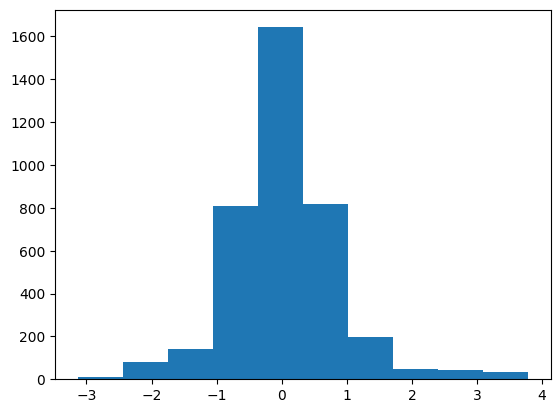

In [22]:
plt.hist(pnls['PnL'])
plt.show()

In [23]:
pnls['PnL'].sum()

174.79680642058642

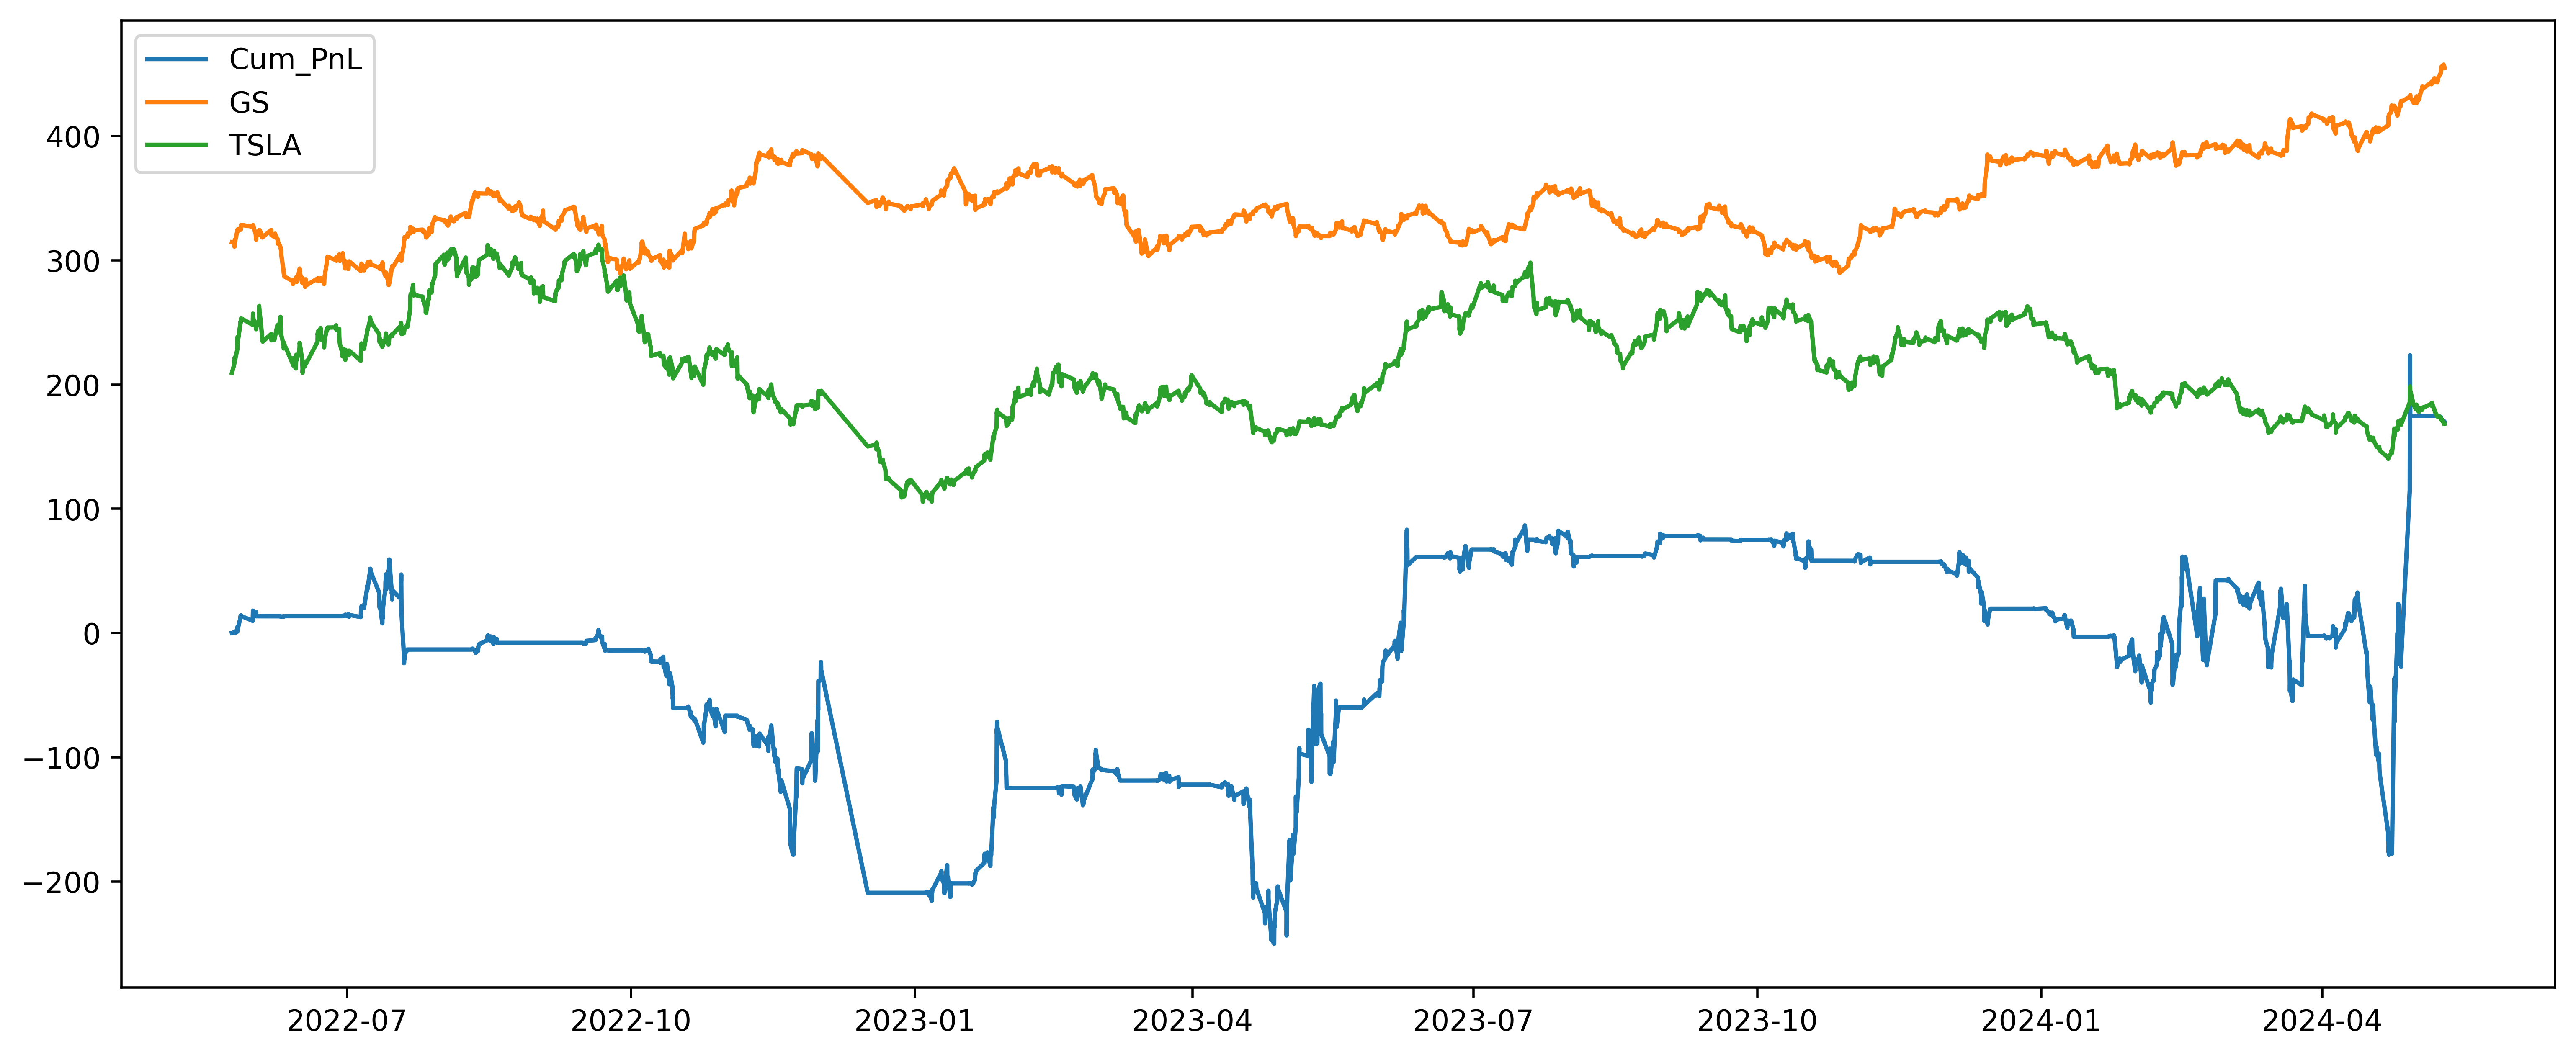

In [24]:
plt.figure(figsize=(15, 6), dpi=500)
# plt.plot(df_X_clean['Cum_Profit'])
# plt.plot(df_X_clean['Position_value'])
plt.plot(df_X_clean['Total_asset'])
plt.plot(df_X_clean['GS'])
plt.plot(df_X_clean['TSLA'])
plt.legend([
    # 'Cum_PnL', 'Position value', 
    "Cum_PnL", "GS", "TSLA"])
# plt.savefig('sim_strat.jpg')
plt.show()


In [25]:
sim_book.cumulative_profit

174.79680642058656

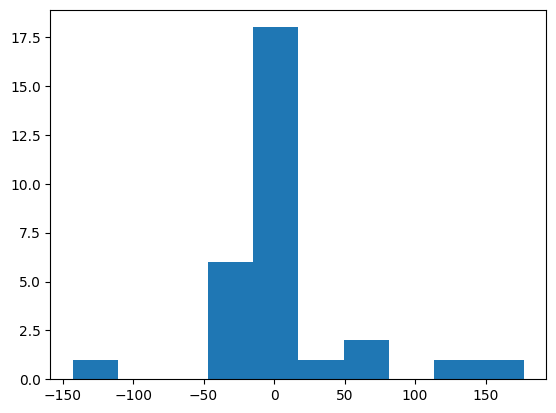

In [26]:
plt.hist(sim_book.profit)
plt.show()

In [27]:
pnls = pd.DataFrame(df_X_clean['Total_asset'])
pnls.describe()

,Total_asset
count,3364.000000
mean,-18.202668
std,86.265807
min,-250.057315
25%,-74.511489
50%,-3.874582
75%,57.318928
max,223.639717
